# **Import the libraries**

In [1]:
import pandas as pd
import os
import datetime
import calendar
from sklearn.preprocessing import OrdinalEncoder
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
from sklearn.metrics import r2_score,mean_squared_error

warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=UserWarning)


# **Read Data**

In [2]:
train_df = pd.read_csv('/kaggle/input/seoul-bike-rental-ai-pro-iti/train.csv')
test_df = pd.read_csv('/kaggle/input/seoul-bike-rental-ai-pro-iti/test.csv')

# Rename the columns

In [3]:
train_df.rename(columns={'Temperature(�C)':'Temperature','Humidity(%)':'Humidity','Wind speed (m/s)':'Wind_speed','Dew point temperature(�C)':'Dew_point_temperature',
                        'Solar Radiation (MJ/m2)':'Solar_Radiation','Visibility (10m)':'Visibility','Functioning Day':'Functioning_Day',
                       'Rainfall(mm)':'Rainfall','Snowfall (cm)':'Snowfall'},inplace=True)

test_df.rename(columns={'Temperature(�C)':'Temperature','Humidity(%)':'Humidity','Wind speed (m/s)':'Wind_speed','Dew point temperature(�C)':'Dew_point_temperature',
                        'Solar Radiation (MJ/m2)':'Solar_Radiation','Visibility (10m)':'Visibility','Functioning Day':'Functioning_Day',
                       'Rainfall(mm)':'Rainfall','Snowfall (cm)':'Snowfall'},inplace=True)



***
## <a name="eda"></a>  Exploratory Data Analysis(EDA)

In [4]:
def add_encode(df, column, max_value):
    """
    The function is encoding time series cyclical features with sin and cos.
    Input: 
    ---------
    df - pandas DataFrame
    column - column name
    max_value - column max value
    Output: 
    -----------
    -same dataframe with _sin and _cos columns added
    """
    #assert_true(column in set(df.columns))
    
    df[column + '_sin'] = np.sin(2 * np.pi * df[column] / max_value)
    df[column + '_cos'] = np.cos(2 * np.pi * df[column] / max_value)
    
    #assert_true((column + '_sin') in set(df.columns))
    #assert_true((column + '_cos') in set(df.columns))
    return df

In [5]:
train_df.shape

(5760, 15)

In [6]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5760 entries, 0 to 5759
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   ID                     5760 non-null   int64  
 1   Date                   5760 non-null   object 
 2   y                      5760 non-null   int64  
 3   Hour                   5760 non-null   int64  
 4   Temperature            5760 non-null   float64
 5   Humidity               5760 non-null   int64  
 6   Wind_speed             5760 non-null   float64
 7   Visibility             5760 non-null   int64  
 8   Dew_point_temperature  5760 non-null   float64
 9   Solar_Radiation        5760 non-null   float64
 10  Rainfall               5760 non-null   float64
 11  Snowfall               5760 non-null   float64
 12  Seasons                5760 non-null   object 
 13  Holiday                5760 non-null   object 
 14  Functioning_Day        5760 non-null   object 
dtypes: f

In [7]:
train_df.dtypes

ID                         int64
Date                      object
y                          int64
Hour                       int64
Temperature              float64
Humidity                   int64
Wind_speed               float64
Visibility                 int64
Dew_point_temperature    float64
Solar_Radiation          float64
Rainfall                 float64
Snowfall                 float64
Seasons                   object
Holiday                   object
Functioning_Day           object
dtype: object

In [8]:
train_df.describe()

,ID,y,Hour,Temperature,Humidity,Wind_speed,Visibility,Dew_point_temperature,Solar_Radiation,Rainfall,Snowfall
count,5760.000000,5760.000000,5760.000000,5760.000000,5760.000000,5760.000000,5760.000000,5760.000000,5760.000000,5760.000000,5760.000000
mean,2879.500000,703.483854,11.500000,12.803559,58.361806,1.723333,1473.711458,4.058264,0.572325,0.135122,0.046302
std,1662.913107,655.249491,6.922788,11.902206,19.840167,1.047898,585.879880,13.003582,0.869943,1.075320,0.323728
min,0.000000,0.000000,0.000000,-15.100000,0.000000,0.000000,27.000000,-26.900000,0.000000,0.000000,0.000000
25%,1439.750000,188.000000,5.750000,3.200000,43.000000,0.900000,1025.750000,-5.400000,0.000000,0.000000,0.000000
50%,2879.500000,485.500000,11.500000,13.700000,57.000000,1.500000,1732.000000,5.200000,0.010000,0.000000,0.000000
75%,4319.250000,1066.000000,17.250000,22.225000,73.000000,2.300000,2000.000000,14.700000,0.940000,0.000000,0.000000
max,5759.000000,3556.000000,23.000000,39.400000,98.000000,7.400000,2000.000000,27.200000,3.520000,35.000000,5.100000


In [9]:
train_df.duplicated().count()
#No duplicates

5760

In [10]:
train_df.isna().sum()
#No Nulls 

ID                       0
Date                     0
y                        0
Hour                     0
Temperature              0
Humidity                 0
Wind_speed               0
Visibility               0
Dew_point_temperature    0
Solar_Radiation          0
Rainfall                 0
Snowfall                 0
Seasons                  0
Holiday                  0
Functioning_Day          0
dtype: int64

<AxesSubplot:xlabel='Hour', ylabel='y'>

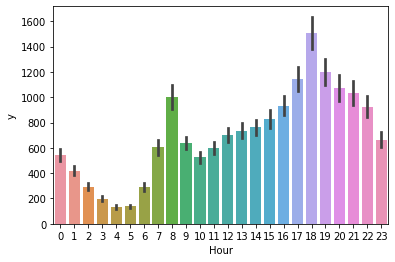

In [11]:
sns.barplot(x = 'Hour',y = 'y' ,data = train_df )

In [12]:
train_df.Hour.isin ([8,16,17,18,19,20,21,22])

0       False
1       False
2       False
3       False
4       False
        ...  
5755     True
5756     True
5757     True
5758     True
5759    False
Name: Hour, Length: 5760, dtype: bool

In [13]:
train_df['day_night']=train_df['Hour'].apply(lambda x : 'Night' if (x >20 or x<5) else( 'Day'))
#train_df['peak_hour'] = train_df.Hour.isin ([8,16,17,18,19,20,21,22])

#get weekday and month 
train_df['Date'] = pd.to_datetime(train_df['Date'])
train_df['WeekDay']=train_df["Date"].dt.day_name()
train_df['Month']=train_df['Date'].dt.month
train_df['Day'] = train_df['Date'].dt.day
train_df['Year'] = train_df['Date'].dt.year
train_df['working_day'] = (train_df['Date'].dt.dayofweek < 5).astype(np.int)

train_df['peak'] = train_df[['working_day', 'Hour']].apply(lambda x: (0, 1)[x['working_day']== 1 and ((x['Hour'] >=7 and x['Hour'] <=9) or (x['Hour'] >=17 and x['Hour'] <=22))], axis = 1)


#convert categorical to numerical
ord_enc = OrdinalEncoder()
train_df["Seasons"] = ord_enc.fit_transform(train_df[["Seasons"]])
train_df["WeekDay"] = ord_enc.fit_transform(train_df[["WeekDay"]])
train_df["Month"] = ord_enc.fit_transform(train_df[["Month"]])
train_df["Holiday"] = ord_enc.fit_transform(train_df[["Holiday"]])
train_df["Functioning_Day"] = ord_enc.fit_transform(train_df[["Functioning_Day"]])
train_df["day_night"] = ord_enc.fit_transform(train_df[["day_night"]])
#weather status
train_df['ideal'] = train_df[['Temperature', 'Wind_speed']].apply(lambda x: (0, 1)[x['Temperature'] > 27 and x['Wind_speed'] < 30], axis = 1)
train_df['sticky'] = train_df[['Humidity', 'working_day']].apply(lambda x: (0, 1)[x['working_day'] == 1 and x['Humidity'] >= 60], axis = 1)

#log scale
train_df['Wind_speed'] = np.log(train_df['Wind_speed'] + 1)
train_df['Solar_Radiation'] = np.sqrt(train_df['Solar_Radiation'])

train_df['Rainfall'] = train_df.rolling(2, min_periods=1)['Rainfall'].mean()
train_df['dryness'] = 1 / (train_df.Rainfall + 1)
train_df = train_df.drop('Rainfall', axis=1)

train_df['Snowfall'] = train_df.rolling(8, min_periods=1)['Snowfall'].mean()
train_df['snowing'] = (train_df.Snowfall > 0).astype(np.int)
train_df = train_df.drop('Snowfall', axis=1)

train_df['invisb'] = train_df.Visibility.max() - train_df.Visibility
train_df = train_df.drop('Visibility', axis=1)
add_encode(train_df,'Hour',23)
add_encode(train_df,'Month',12)

train_df['Humiditylg'] = train_df['Humidity'].map(np.log1p)
train_df['y'] = train_df['y'].map(np.log1p)
#train_df['y'] = train_df['y'].map(np.sqrt)


#time columns
time_cols = ['Year', 'Month', 'Day', 'WeekDay', 'working_day', 'Seasons', 'Holiday']
train_df[time_cols + ['y']]



/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:12: DeprecationWarning: In future, it will be an error for 'np.bool_' scalars to be interpreted as an index
  if sys.path[0] == '':
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:24: DeprecationWarning: In future, it will be an error for 'np.bool_' scalars to be interpreted as an index
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:25: DeprecationWarning: In future, it will be an error for 'np.bool_' scalars to be interpreted as an index


,Year,Month,Day,WeekDay,working_day,Seasons,Holiday,y
0,2017,0.0,12,4.0,1,3.0,1.0,5.541264
1,2017,0.0,12,4.0,1,3.0,1.0,5.323010
2,2017,0.0,12,4.0,1,3.0,1.0,5.159055
3,2017,0.0,12,4.0,1,3.0,1.0,4.682131
4,2017,0.0,12,4.0,1,3.0,1.0,4.369448
...,...,...,...,...,...,...,...,...
5755,2018,10.0,20,5.0,1,0.0,1.0,7.183871
5756,2018,10.0,20,5.0,1,0.0,1.0,6.983790
5757,2018,10.0,20,5.0,1,0.0,1.0,6.928538
5758,2018,10.0,20,5.0,1,0.0,1.0,6.827629


In [14]:
train_df.describe()

,ID,y,Hour,Temperature,Humidity,Wind_speed,Dew_point_temperature,Solar_Radiation,Seasons,Holiday,...,ideal,sticky,dryness,snowing,invisb,Hour_sin,Hour_cos,Month_sin,Month_cos,Humiditylg
count,5760.000000,5760.000000,5760.000000,5760.000000,5760.000000,5760.000000,5760.000000,5760.000000,5760.000000,5760.000000,...,5760.000000,5760.000000,5760.000000,5760.000000,5760.000000,5.760000e+03,5760.000000,5.760000e+03,5.760000e+03,5760.000000
mean,2879.500000,5.835566,11.500000,12.803559,58.361806,0.930997,4.058264,0.480664,1.500000,0.958333,...,0.123611,0.333854,0.965579,0.042188,526.288542,-3.702104e-17,0.041667,-3.816392e-18,-1.476442e-17,4.020371
std,1662.913107,1.673230,6.922788,11.902206,19.840167,0.377221,13.003582,0.584248,1.118131,0.199844,...,0.329166,0.471629,0.137789,0.201034,585.879880,6.922788e-01,0.720547,7.071682e-01,7.071682e-01,0.372834
min,0.000000,0.000000,0.000000,-15.100000,0.000000,0.000000,-26.900000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.054054,0.000000,0.000000,-9.976688e-01,-0.990686,-1.000000e+00,-1.000000e+00,0.000000
25%,1439.750000,5.241747,5.750000,3.200000,43.000000,0.641854,-5.400000,0.000000,0.750000,1.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,-6.560249e-01,-0.626438,-5.915064e-01,-5.915064e-01,3.784190
50%,2879.500000,6.187236,11.500000,13.700000,57.000000,0.916291,5.200000,0.100000,1.500000,1.000000,...,0.000000,0.000000,1.000000,0.000000,268.000000,-1.224647e-16,0.067607,6.123234e-17,-6.123234e-17,4.060443
75%,4319.250000,6.972606,17.250000,22.225000,73.000000,1.193922,14.700000,0.969536,2.250000,1.000000,...,0.000000,1.000000,1.000000,0.000000,974.250000,6.560249e-01,0.725520,5.915064e-01,5.915064e-01,4.304065
max,5759.000000,8.176673,23.000000,39.400000,98.000000,2.128232,27.200000,1.876166,3.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1973.000000,9.976688e-01,1.000000,1.000000e+00,1.000000e+00,4.595120


### **Visualization**

<AxesSubplot:>

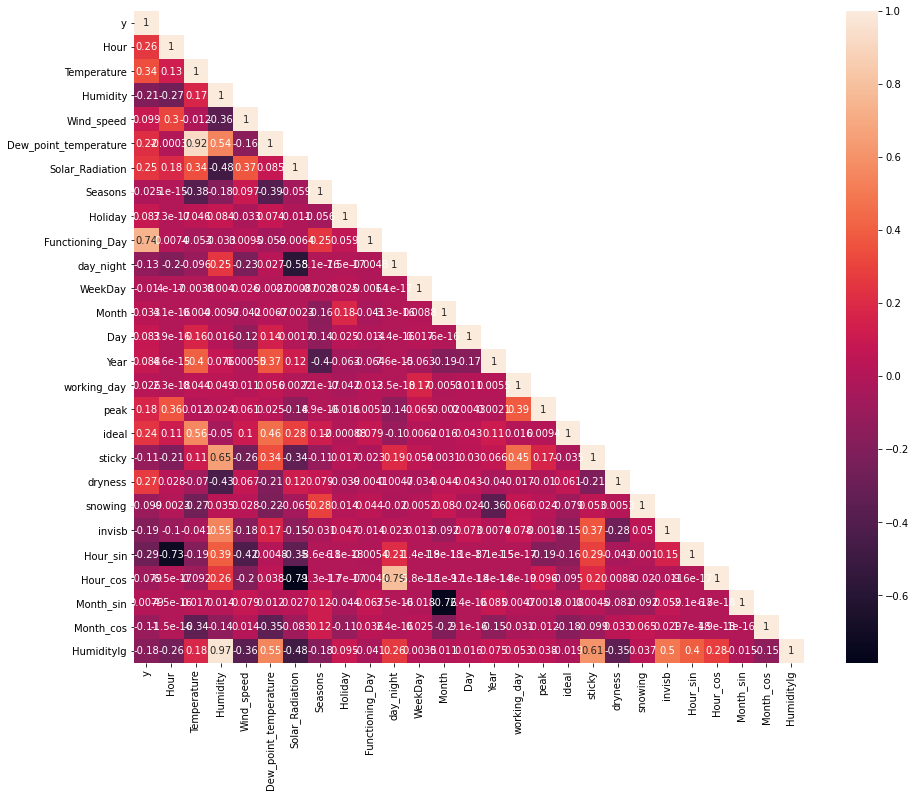

In [15]:
fig, ax = plt.subplots(figsize=(15,12))
cormat= train_df.drop(columns=['ID']).corr()
mask = np.array(cormat)
mask[np.tril_indices_from(mask)] = False
sns.heatmap(cormat,mask=mask,annot = True)

In [16]:
#corr between temperature and due point temp is 92 so we can drop one of them 
# temperature has higher corr with output so wo can drop duepoint temp
train_df = train_df.drop(['Dew_point_temperature'], axis = 1)
train_df.drop(['Date'], axis = 1,inplace=True)
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5760 entries, 0 to 5759
Data columns (total 27 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               5760 non-null   int64  
 1   y                5760 non-null   float64
 2   Hour             5760 non-null   int64  
 3   Temperature      5760 non-null   float64
 4   Humidity         5760 non-null   int64  
 5   Wind_speed       5760 non-null   float64
 6   Solar_Radiation  5760 non-null   float64
 7   Seasons          5760 non-null   float64
 8   Holiday          5760 non-null   float64
 9   Functioning_Day  5760 non-null   float64
 10  day_night        5760 non-null   float64
 11  WeekDay          5760 non-null   float64
 12  Month            5760 non-null   float64
 13  Day              5760 non-null   int64  
 14  Year             5760 non-null   int64  
 15  working_day      5760 non-null   int64  
 16  peak             5760 non-null   int64  
 17  ideal         

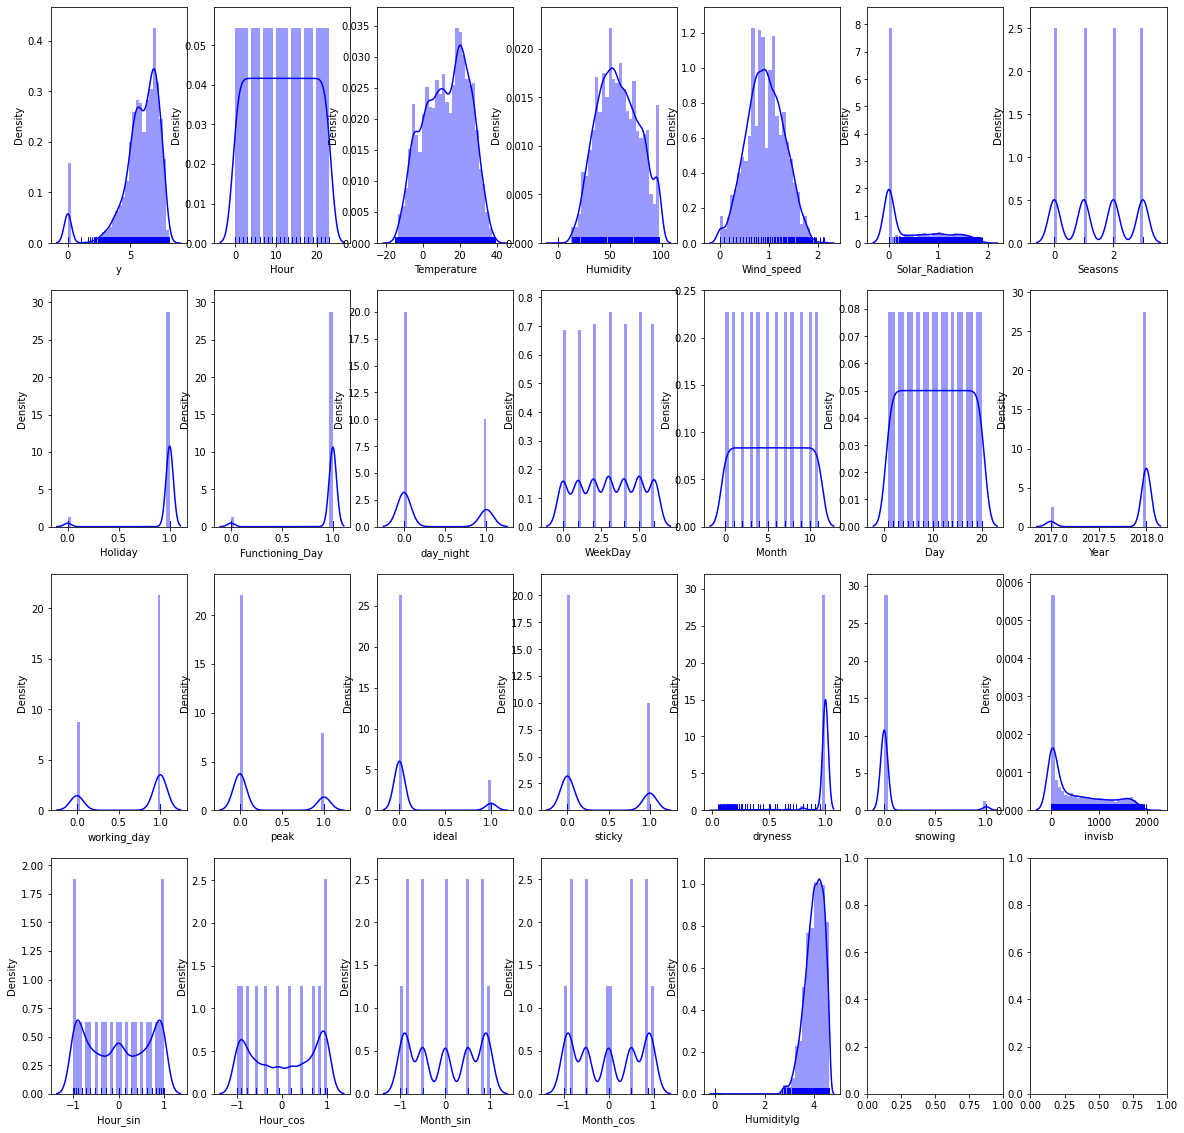

In [17]:
r = 4
c = 7
fig, axs = plt.subplots(r, c, figsize=(20, 20))

i = 0
j = 0
for column in train_df.drop(['ID'], axis=1).columns:
    sns.distplot(train_df[column], rug=True, bins=30, kde=True, hist=True, color='b', ax=axs[i, j])
    if(j == c-1):
        j = 0
        i += 1
    else:
        j += 1

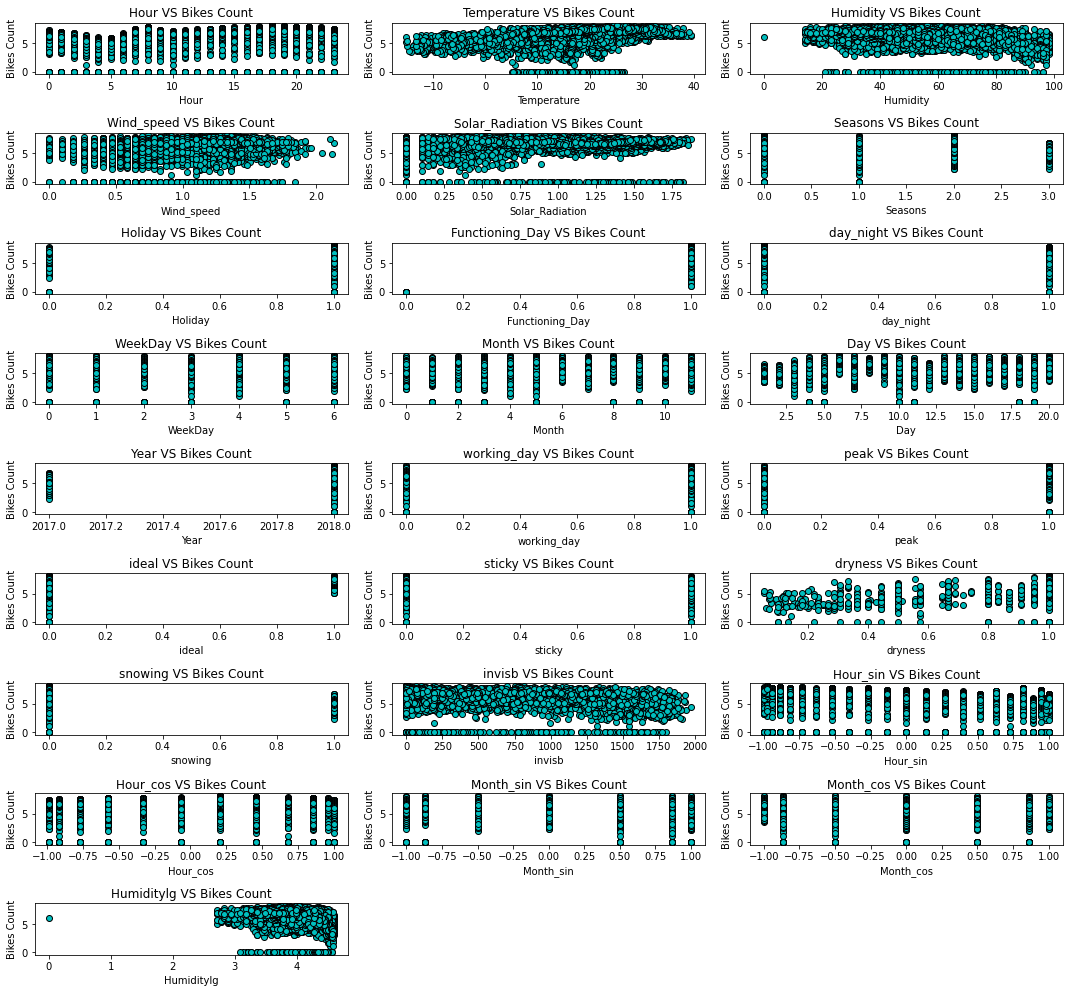

In [18]:
i = 1
plt.figure(figsize = [15, 15], tight_layout = 5)
for column in train_df.drop(['y','ID'], axis=1).columns:
    plt.subplot(10, 3, i)
    plt.scatter(data = train_df, x = column, y = 'y', c='c', edgecolors='black')
    plt.xlabel(column)
    plt.ylabel('Bikes Count')
    plt.title(column + ' VS ' + 'Bikes Count')
    i += 1
plt.show()

 ### Split Data

In [19]:
from sklearn.model_selection import train_test_split

train_set, val_set = train_test_split(train_df, test_size=0.05, random_state=42) 

x_train = train_set.drop(columns=['ID','y'])
y_train = train_set['y']

x_val = val_set.drop(columns=['ID','y'])
y_val = val_set['y']


In [20]:
x_all = train_df.drop(columns=['ID','y'])
y_all = train_df['y']

In [21]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5760 entries, 0 to 5759
Data columns (total 27 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               5760 non-null   int64  
 1   y                5760 non-null   float64
 2   Hour             5760 non-null   int64  
 3   Temperature      5760 non-null   float64
 4   Humidity         5760 non-null   int64  
 5   Wind_speed       5760 non-null   float64
 6   Solar_Radiation  5760 non-null   float64
 7   Seasons          5760 non-null   float64
 8   Holiday          5760 non-null   float64
 9   Functioning_Day  5760 non-null   float64
 10  day_night        5760 non-null   float64
 11  WeekDay          5760 non-null   float64
 12  Month            5760 non-null   float64
 13  Day              5760 non-null   int64  
 14  Year             5760 non-null   int64  
 15  working_day      5760 non-null   int64  
 16  peak             5760 non-null   int64  
 17  ideal         

In [22]:
#train_df.drop(['Humidity','snowing','Year','Wind_speed','working_day','Month'], axis = 1,inplace=True)


# CatBoost Regressor

In [23]:
from catboost import CatBoostRegressor
import timeit
from sklearn.datasets import make_regression
from sklearn.model_selection import GridSearchCV


#'max_depth' : [3,4,5,6],
#'iterations' : [500],
'''
model = CatBoostRegressor()

param = {'iterations' : [2000],
         'learning_rate' : [0.01]
        }
  
    '''
best_cat = CatBoostRegressor(iterations=2000 ,learning_rate = 0.01)

# train the model
best_cat.fit(    
     x_train,
     y_train,
     eval_set=(x_val, y_val),
     verbose=False
)

#gridSearch_Cat=GridSearchCV(model,param,scoring='r2',cv=20)
#gridSearch_Cat.fit(x_train,y_train)


In [24]:

#best_cat=gridSearch_Cat.best_estimator_
cat_testScore=best_cat.score(x_val,y_val)
print(cat_testScore)

0.9423167130220436


In [25]:
x_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5472 entries, 1545 to 860
Data columns (total 25 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Hour             5472 non-null   int64  
 1   Temperature      5472 non-null   float64
 2   Humidity         5472 non-null   int64  
 3   Wind_speed       5472 non-null   float64
 4   Solar_Radiation  5472 non-null   float64
 5   Seasons          5472 non-null   float64
 6   Holiday          5472 non-null   float64
 7   Functioning_Day  5472 non-null   float64
 8   day_night        5472 non-null   float64
 9   WeekDay          5472 non-null   float64
 10  Month            5472 non-null   float64
 11  Day              5472 non-null   int64  
 12  Year             5472 non-null   int64  
 13  working_day      5472 non-null   int64  
 14  peak             5472 non-null   int64  
 15  ideal            5472 non-null   int64  
 16  sticky           5472 non-null   int64  
 17  dryness     

In [26]:
#model.score(x_val,y_val)
yhat = np.exp(best_cat.predict(x_val)) 
for i in range(len(yhat)) :
    if yhat[i] < 0 :
        #print(yhat[i])
        yhat[i] = 0

In [27]:
from sklearn.metrics import mean_squared_log_error

print(np.sqrt(mean_squared_log_error( np.exp(y_val), yhat)))
print(r2_score( np.exp(y_val),yhat))

0.36746702128130027
0.8226689731358368


In [28]:
test_df = pd.read_csv('../input/seoul-bike-rental-ai-pro-iti/test.csv')

In [29]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   ID                         3000 non-null   int64  
 1   Date                       3000 non-null   object 
 2   Hour                       3000 non-null   int64  
 3   Temperature(�C)            3000 non-null   float64
 4   Humidity(%)                3000 non-null   int64  
 5   Wind speed (m/s)           3000 non-null   float64
 6   Visibility (10m)           3000 non-null   int64  
 7   Dew point temperature(�C)  3000 non-null   float64
 8   Solar Radiation (MJ/m2)    3000 non-null   float64
 9   Rainfall(mm)               3000 non-null   float64
 10  Snowfall (cm)              3000 non-null   float64
 11  Seasons                    3000 non-null   object 
 12  Holiday                    3000 non-null   object 
 13  Functioning Day            3000 non-null   objec

In [30]:
test_df.rename(columns={'Temperature(�C)':'Temperature','Humidity(%)':'Humidity','Wind speed (m/s)':'Wind_speed','Dew point temperature(�C)':'Dew_point_temperature',
                        'Solar Radiation (MJ/m2)':'Solar_Radiation','Visibility (10m)':'Visibility','Functioning Day':'Functioning_Day',
                       'Rainfall(mm)':'Rainfall','Snowfall (cm)':'Snowfall'},inplace=True)

test_df['day_night']=test_df['Hour'].apply(lambda x : 'Night' if (x >20 or x<5) else( 'Day'))
#test_df['peak_hour'] = test_df.Hour.isin ([8,16,17,18,19,20,21,22])


#get weekday and month 
test_df['Date'] = pd.to_datetime(test_df['Date'])
test_df['WeekDay']=test_df["Date"].dt.day_name()
test_df['Month']=test_df['Date'].dt.month
test_df['Day'] = test_df['Date'].dt.day
test_df['Year'] = test_df['Date'].dt.year
test_df['working_day'] = (test_df['Date'].dt.dayofweek < 5).astype(np.int)
test_df['peak'] = test_df[['working_day', 'Hour']].apply(lambda x: (0, 1)[x['working_day']== 1 and ((x['Hour'] >=7 and x['Hour'] <=9) or (x['Hour'] >=17 and x['Hour'] <=22))], axis = 1)


#convert categorical to numerical
ord_enc = OrdinalEncoder()
test_df["Seasons"] = ord_enc.fit_transform(test_df[["Seasons"]])
test_df["WeekDay"] = ord_enc.fit_transform(test_df[["WeekDay"]])
test_df["Month"] = ord_enc.fit_transform(test_df[["Month"]])
test_df["Holiday"] = ord_enc.fit_transform(test_df[["Holiday"]])
test_df["Functioning_Day"] = ord_enc.fit_transform(test_df[["Functioning_Day"]])
test_df["day_night"] = ord_enc.fit_transform(test_df[["day_night"]])
#weather status
test_df['ideal'] = test_df[['Temperature', 'Wind_speed']].apply(lambda x: (0, 1)[x['Temperature'] > 27 and x['Wind_speed'] < 30], axis = 1)
test_df['sticky'] = test_df[['Humidity', 'working_day']].apply(lambda x: (0, 1)[x['working_day'] == 1 and x['Humidity'] >= 60], axis = 1)

#log scale
test_df['Wind_speed'] = np.log(test_df['Wind_speed'] + 1)
test_df['Solar_Radiation'] = np.sqrt(test_df['Solar_Radiation'])

test_df['Rainfall'] = test_df.rolling(2, min_periods=1)['Rainfall'].mean()
test_df['dryness'] = 1 / (test_df.Rainfall + 1)
test_df = test_df.drop('Rainfall', axis=1)

test_df['Snowfall'] = test_df.rolling(8, min_periods=1)['Snowfall'].mean()
test_df['snowing'] = (test_df.Snowfall > 0).astype(np.int)
test_df = test_df.drop('Snowfall', axis=1)

test_df['invisb'] = test_df.Visibility.max() - test_df.Visibility
test_df = test_df.drop('Visibility', axis=1)

test_df['Humiditylg'] = test_df['Humidity'].map(np.log1p)
#test_df['y'] = test_df['y'].map(np.log1p)
#time columns
time_cols = ['Year', 'Month', 'Day', 'WeekDay', 'working_day', 'Seasons','Holiday']
test_df[time_cols ]
add_encode(test_df,'Hour',23)
add_encode(test_df,'Month',12)



/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:16: DeprecationWarning: In future, it will be an error for 'np.bool_' scalars to be interpreted as an index
  app.launch_new_instance()
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:28: DeprecationWarning: In future, it will be an error for 'np.bool_' scalars to be interpreted as an index
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:29: DeprecationWarning: In future, it will be an error for 'np.bool_' scalars to be interpreted as an index


,ID,Date,Hour,Temperature,Humidity,Wind_speed,Dew_point_temperature,Solar_Radiation,Seasons,Holiday,...,ideal,sticky,dryness,snowing,invisb,Humiditylg,Hour_sin,Hour_cos,Month_sin,Month_cos
0,5760,2017-12-21,0,-1.3,90,1.098612,-2.7,0.0,3.0,1.0,...,0,1,1.0,1,1741,4.510860,0.000000e+00,1.000000,-0.500000,0.866025
1,5761,2017-12-21,1,-1.8,90,0.955511,-3.2,0.0,3.0,1.0,...,0,1,1.0,1,1737,4.510860,2.697968e-01,0.962917,-0.500000,0.866025
2,5762,2017-12-21,2,-2.2,88,0.875469,-3.9,0.0,3.0,1.0,...,0,1,1.0,1,1652,4.488636,5.195840e-01,0.854419,-0.500000,0.866025
3,5763,2017-12-21,3,-2.9,89,0.832909,-4.4,0.0,3.0,1.0,...,0,1,1.0,1,1712,4.499810,7.308360e-01,0.682553,-0.500000,0.866025
4,5764,2017-12-21,4,-3.6,91,0.788457,-4.8,0.0,3.0,1.0,...,0,1,1.0,1,1759,4.521789,8.878852e-01,0.460065,-0.500000,0.866025
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2995,8755,2018-11-30,19,4.2,34,1.280934,-10.3,0.0,0.0,1.0,...,0,0,1.0,0,106,3.555348,-8.878852e-01,0.460065,-0.866025,0.500000
2996,8756,2018-11-30,20,3.4,37,1.193922,-9.9,0.0,0.0,1.0,...,0,0,1.0,0,0,3.637586,-7.308360e-01,0.682553,-0.866025,0.500000
2997,8757,2018-11-30,21,2.6,39,0.262364,-9.9,0.0,0.0,1.0,...,0,0,1.0,0,32,3.688879,-5.195840e-01,0.854419,-0.866025,0.500000
2998,8758,2018-11-30,22,2.1,41,0.693147,-9.8,0.0,0.0,1.0,...,0,0,1.0,0,141,3.737670,-2.697968e-01,0.962917,-0.866025,0.500000


In [31]:
#test_df.drop(['Date','Humidity','snowing','Year','Solar_Radiation'], axis = 1,inplace=True)

test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 28 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   ID                     3000 non-null   int64         
 1   Date                   3000 non-null   datetime64[ns]
 2   Hour                   3000 non-null   int64         
 3   Temperature            3000 non-null   float64       
 4   Humidity               3000 non-null   int64         
 5   Wind_speed             3000 non-null   float64       
 6   Dew_point_temperature  3000 non-null   float64       
 7   Solar_Radiation        3000 non-null   float64       
 8   Seasons                3000 non-null   float64       
 9   Holiday                3000 non-null   float64       
 10  Functioning_Day        3000 non-null   float64       
 11  day_night              3000 non-null   float64       
 12  WeekDay                3000 non-null   float64       
 13  Mon

In [32]:
yhat1 = np.expm1(best_cat.predict(test_df[x_train.columns])) 
#model.score(x_val,y_val)
for i in range(len(yhat1)) :
    if yhat1[i] < 0 :
        #print(yhat[i])
        yhat1[i] = 0

In [33]:

#print(np.sqrt(mean_squared_log_error( test_df['Rented Bike Count'], yhat1)))
#print(r2_score(test_df['Rented Bike Count'],yhat1))

In [34]:
x_train.columns

Index(['Hour', 'Temperature', 'Humidity', 'Wind_speed', 'Solar_Radiation',
       'Seasons', 'Holiday', 'Functioning_Day', 'day_night', 'WeekDay',
       'Month', 'Day', 'Year', 'working_day', 'peak', 'ideal', 'sticky',
       'dryness', 'snowing', 'invisb', 'Hour_sin', 'Hour_cos', 'Month_sin',
       'Month_cos', 'Humiditylg'],
      dtype='object')

# LGBMRegressor

In [35]:
import lightgbm as lgb
hyperparameters = { 'colsample_bytree': 0.639,  'learning_rate': 0.011,
                    'num_leaves': 30,
                   'subsample': 0.916, 'n_estimators': 2000}
model = lgb.LGBMRegressor(**hyperparameters)
model.fit(x_train, y_train)


LGBMRegressor(colsample_bytree=0.639, learning_rate=0.011, n_estimators=2000,
              num_leaves=30, subsample=0.916)

In [36]:
lgb_testScore=model.score(x_val,y_val)
print(lgb_testScore)

0.9516663904024087


In [37]:
#model.score(x_val,y_val)
yhat2 = (model.predict(x_val))
for i in range(len(yhat2)) :
    if yhat2[i] < 0 :
        #print(yhat[i])
        yhat2[i] = 0
yhat2 = np.expm1(yhat2) 
from sklearn.metrics import mean_squared_log_error

#print(np.sqrt(mean_squared_log_error( np.expm1(y_val) , yhat2)))
#print(r2_score( np.expm1(y_val),yhat2))

In [38]:
print(test_df.drop(columns = ['ID']).columns)
print(train_df.columns)

Index(['Date', 'Hour', 'Temperature', 'Humidity', 'Wind_speed',
       'Dew_point_temperature', 'Solar_Radiation', 'Seasons', 'Holiday',
       'Functioning_Day', 'day_night', 'WeekDay', 'Month', 'Day', 'Year',
       'working_day', 'peak', 'ideal', 'sticky', 'dryness', 'snowing',
       'invisb', 'Humiditylg', 'Hour_sin', 'Hour_cos', 'Month_sin',
       'Month_cos'],
      dtype='object')
Index(['ID', 'y', 'Hour', 'Temperature', 'Humidity', 'Wind_speed',
       'Solar_Radiation', 'Seasons', 'Holiday', 'Functioning_Day', 'day_night',
       'WeekDay', 'Month', 'Day', 'Year', 'working_day', 'peak', 'ideal',
       'sticky', 'dryness', 'snowing', 'invisb', 'Hour_sin', 'Hour_cos',
       'Month_sin', 'Month_cos', 'Humiditylg'],
      dtype='object')


In [39]:
yhat2 = np.expm1(model.predict(test_df[x_train.columns] )) - 4
#model.score(x_val,y_val)
for i in range(len(yhat2)) :
    if yhat2[i] < 0 :
        #print(yhat[i])
        yhat2[i] = 0


In [40]:

#print(np.sqrt(mean_squared_log_error( test_df['Rented Bike Count'], yhat2)))
#print(r2_score(test_df['Rented Bike Count'],yhat2))

<BarContainer object of 25 artists>

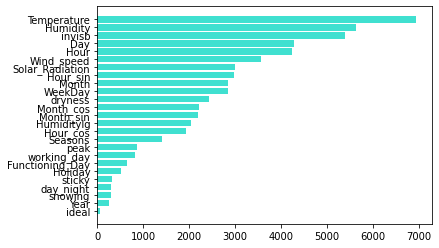

In [41]:
sorted_feature_importance = model.feature_importances_.argsort()
plt.barh(x_train.columns[sorted_feature_importance], 
         model.feature_importances_[sorted_feature_importance], 
         color='turquoise')

In [42]:
print(x_train.columns[sorted_feature_importance])

Index(['ideal', 'Year', 'snowing', 'day_night', 'sticky', 'Holiday',
       'Functioning_Day', 'working_day', 'peak', 'Seasons', 'Hour_cos',
       'Humiditylg', 'Month_sin', 'Month_cos', 'dryness', 'WeekDay', 'Month',
       'Hour_sin', 'Solar_Radiation', 'Wind_speed', 'Hour', 'Day', 'invisb',
       'Humidity', 'Temperature'],
      dtype='object')


In [43]:
yhat = np.round(0.8*yhat1 + (0.2)*yhat2)

#print(np.sqrt(mean_squared_log_error( test_df['Rented Bike Count'], yhat)))
#print(r2_score(test_df['Rented Bike Count'],yhat))

# XGboost

# submission

In [44]:
X_test = test_df.drop(columns=['ID'])
test_df['y'] = yhat
test_df[['ID', 'y']].to_csv('/kaggle/working/sample_submission.csv', index=False)

